# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# 1. Introduction <a name="introduction"></a>
A description of the problem and a discussion of the background

The Internet revolution brought more than social medias and faster information exchanges. It brought also a generation of people who studies through the digital environments. Under this context, the online education evolved quickly and the transformation of the societies really started. Nowadays, people in distant places, poor countries can benefit from technology to achieve information and in this case, the Massive Open Online Courses, MOOCs had a major role.
MOOCs can join people all around the world to achieve understand in a wide range of areas, delivering science and culture.

It is known, also, that online learning suffers massive unenrollment. The logical border and the lack of motivation can make the students leave. Under this context, what are the related features which causes it? How understand the student scenario and predict his churn or low grades?
I think that is a relevant point. If MOOCs platforms achieve student understanding and predicting, I think it's possible to menage the student's churn and find a way to give them the needed motivation.

With this set in mind, I started a search for MOOCs generated Students Data to investigate and prepare some conclusions about the theme.


# 2. Data
A description of the data and how it will be used to solve the problem

To guide my investigation, I was looking for a Set to help to understand the student's behavior, motivation and correlated characteristics in order to better understand why or how is the result of an enrollment. So, it is important to find a dataset with some key features like grade, gender, enrollment levels, and so on. Location data is also important to understand cultural marks, which will be explored by locations APIs.
Guided by the analysis exploration, I'll be able to build a model to predict student's behavior or results.
After querying correlated datasets in order to find those with better columns, I found a nice DataSet from Kaggle called "Students' Academic Performance Dataset". You can check it here https://www.kaggle.com/aljarah/xAPI-Edu-Data.
<p> The data compounds 16 columns with aggregated informations about over 480 students of a Learning Platform called Kalboard360. The datails will be shown next section.


## 2.1 Data Structure

As previously mentioned, this dataset includes 16 columns:

1. Gender - student's gender (nominal: 'Male' or 'Female’)

2. Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3. Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4. Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5. Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6. Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7. Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8. Semester- school year semester (nominal:’ First’,’ Second’)

9. Parent responsible for student (nominal:’mom’,’father’)

10. Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11. Visited resources- how many times the student visits a course content(numeric:0-100)

12. Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13. Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14. Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15. Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16. Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The most important characteristic of this dataset is that it has included the parent's data, which is a nice approach to understand the student.

# 3. Methodology

The first steps are the data exploration and insight-taking approach in order to better understand the data and the columns. The purpose of this exploratory analysis is to identify hidden features and understand the relations between the features.
Next, I'll do a descritive analysis by building a dataset for a clustering algorithm. This way, the data understanding will become a more powerfull decision making, focused on student's behaviors.
Finally, I'll create a my predictive analysis by building a dataset with the best features for a supervised learning algorithm to predict the student's beahvior under certain conditions, which will achieve my final objective.

# 4. Analysis

As mentioned, this section will understand the data in order to compose the clustering dataset.

### 4.1 Exploratory Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('xAPI-Edu-Data.csv')
dataset.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In the context to understand the student and his results, setting up a dataframe with certain columns

In [3]:
df = dataset[['gender','PlaceofBirth','StageID','Topic','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class']]
df.head()

,gender,PlaceofBirth,StageID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,IT,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,IT,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,IT,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,IT,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,IT,40,50,12,50,No,Bad,Above-7,M


Try to understand the results from countries

In [4]:
df.groupby(['ParentschoolSatisfaction'])['Class'].value_counts(normalize=True)


ParentschoolSatisfaction  Class
Bad                       L        0.446809
                          M        0.425532
                          H        0.127660
Good                      M        0.448630
                          H        0.404110
                          L        0.147260
Name: Class, dtype: float64

In [5]:
df.groupby(['ParentAnsweringSurvey'])['ParentschoolSatisfaction'].value_counts(normalize=True)

ParentAnsweringSurvey  ParentschoolSatisfaction
No                     Bad                         0.690476
                       Good                        0.309524
Yes                    Good                        0.840741
                       Bad                         0.159259
Name: ParentschoolSatisfaction, dtype: float64

It seems that parents which aren't envolved in answering the scholar's surveys are likely to become unsatisfied with the School. This can mean that well informed parents can better understand the student's enrollment and reality and are better satisfied.

### Question: What is the relation between active parents and student's classification?

In [6]:
df.groupby(['ParentAnsweringSurvey'])['Class'].value_counts(normalize=True)

ParentAnsweringSurvey  Class
No                     L        0.471429
                       M        0.395238
                       H        0.133333
Yes                    M        0.474074
                       H        0.422222
                       L        0.103704
Name: Class, dtype: float64

So, definitively parent's active behavior has an important role on student's growth.

## Understanding student's behavior 

Next, it is important to know what characteristics are linked to students sucess. So, we're going to test the features related.

In [7]:
df2 = dataset[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
df2.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,15,16,2,20,Under-7,M
1,M,20,20,3,25,Under-7,M
2,M,10,7,0,30,Above-7,L
3,M,30,25,5,35,Above-7,L
4,M,40,50,12,50,Above-7,M


### Question: What's the relation between raising hands and classification?

In [8]:
df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)
df2.groupby(['raisedhands'])['Class'].value_counts(normalize=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


raisedhands  Class
0            L        0.534314
             M        0.392157
             H        0.073529
1            M        0.577778
             H        0.288889
             L        0.133333
2            H        0.543011
             M        0.424731
             L        0.032258
Name: Class, dtype: float64

So, it seems that students which has low levels of raising hands are most likely to have Low classification. In the otherside, high frequency of raising hands are linked to higher classification.

Next, we're going to check the act of visiting the course resources.

In [9]:
df2['VisITedResources'] = pd.cut(df2.VisITedResources, bins=3, labels=np.arange(3), right=False)
df2.groupby(['VisITedResources'])['Class'].value_counts(normalize=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


VisITedResources  Class
0                 L        0.656250
                  M        0.293750
                  H        0.050000
1                 M        0.560976
                  H        0.231707
                  L        0.207317
2                 M        0.495798
                  H        0.483193
                  L        0.021008
Name: Class, dtype: float64

Low levels of resource exploring means lower levels of classification. High levels of visiting resources are linked to higher classification.

In [10]:
df2['AnnouncementsView'] = pd.cut(df2.AnnouncementsView, bins=3, labels=np.arange(3), right=False)
df2.groupby(['AnnouncementsView'])['Class'].value_counts(normalize=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


AnnouncementsView  Class
0                  L        0.468354
                   M        0.388186
                   H        0.143460
1                  M        0.506667
                   H        0.393333
                   L        0.100000
2                  H        0.526882
                   M        0.462366
                   L        0.010753
Name: Class, dtype: float64

The act of visualizing the announcements makes the students more prepared for the tasks and they are most likely to plan the assessments of the week. High visualization frequency is lined, indeed, to better classifications.

In [11]:
df2['Discussion'] = pd.cut(df2.Discussion, bins=3, labels=np.arange(3), right=False)
df2.groupby(['Discussion'])['Class'].value_counts(normalize=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Discussion  Class
0           M        0.416290
            L        0.371041
            H        0.212670
1           M        0.538462
            H        0.253846
            L        0.207692
2           H        0.480620
            M        0.379845
            L        0.139535
Name: Class, dtype: float64

Suprisingly, discussion frequency is weakly linked to higher results, at least, directly. Of course, there are higher interactions levels ocrring with Higher graded students but the data shows that discussion is a secondary act.

Concluding this step on analysis, we're going to understand the absence rate with the grade level

In [12]:
df2.groupby(['StudentAbsenceDays'])['Class'].value_counts(normalize=True)

StudentAbsenceDays  Class
Above-7             L        0.607330
                    M        0.371728
                    H        0.020942
Under-7             M        0.484429
                    H        0.477509
                    L        0.038062
Name: Class, dtype: float64

As expected, the lower the absence of the student, the higher tends to become their classification. Let's keep this feature.

### 4.1.1 Clustering DataSet

Now that we know what are the important features to understand the student's behavior and classification, we're going to build a dataset for a K-Means algorithm, which will show the student's cluster.

To make the construction process easiest to understand, we're going to reimplement the dataset building phases.

In [13]:
df2 = dataset[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
df2.tail()


,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
475,F,5,4,5,8,Above-7,L
476,F,50,77,14,28,Under-7,M
477,F,55,74,25,29,Under-7,M
478,F,30,17,14,57,Above-7,L
479,F,35,14,23,62,Above-7,L


Let's identify the correlations between the student's actions

In [14]:
correlation = df2[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].corr(method='pearson')
correlation

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


This made clear that our best correlated features are raisedHands and visitedResources, which will compose our model dataset further.

So, we need an <b>one hot encoding</b> on columns gender,absence and class

In [15]:
df2 = pd.concat([df2,pd.get_dummies(df2['gender'], prefix='gender_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['StudentAbsenceDays'], prefix='absence_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Class'], prefix='class_')], axis=1)

df2.drop(['gender'], axis = 1,inplace=True)
df2.drop(['StudentAbsenceDays'], axis = 1,inplace=True)
df2.drop(['Class'], axis = 1,inplace=True)

df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender__F,gender__M,absence__Above-7,absence__Under-7,class__H,class__L,class__M
0,15,16,2,20,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,1,0,0,1
2,10,7,0,30,0,1,1,0,0,1,0
3,30,25,5,35,0,1,1,0,0,1,0
4,40,50,12,50,0,1,1,0,0,0,1


In [16]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

So, based on previous exploratory analysis, was possible to identify that raised hands and announcements visualization brings most results respect high classification. So, both features will compound our X axis

In [17]:
X = df2[['raisedhands', 'VisITedResources']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
X

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.15      , 0.16161616],
       [0.2       , 0.2020202 ],
       [0.1       , 0.07070707],
       [0.3       , 0.25252525],
       [0.4       , 0.50505051],
       [0.42      , 0.3030303 ],
       [0.35      , 0.12121212],
       [0.5       , 0.1010101 ],
       [0.12      , 0.21212121],
       [0.7       , 0.80808081],
       [0.5       , 0.88888889],
       [0.19      , 0.06060606],
       [0.05      , 0.01010101],
       [0.2       , 0.14141414],
       [0.62      , 0.70707071],
       [0.3       , 0.4040404 ],
       [0.36      , 0.3030303 ],
       [0.55      , 0.13131313],
       [0.69      , 0.15151515],
       [0.7       , 0.50505051],
       [0.6       , 0.60606061],
       [0.1       , 0.12121212],
       [0.15      , 0.21212121],
       [0.02      , 0.        ],
       [0.        , 0.02020202],
       [0.08      , 0.07070707],
       [0.19      , 0.19191919],
       [0.25      , 0.15151515],
       [0.75      , 0.85858586],
       [0.3       , 0.90909091],
       [0.

Using the Elbow Method to find the best K for Kmeans based on our data

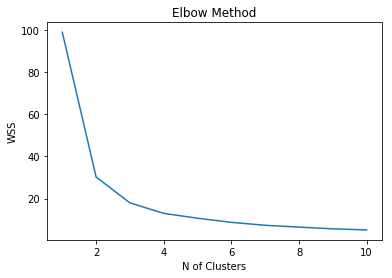

In [18]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    #print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

So, the ideal K is 3. Now we are going to build the Kmeans with k=3

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

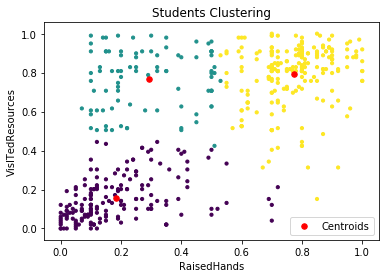

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 10, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Students Clustering')
plt.xlabel('RaisedHands')
plt.ylabel('VisITedResources')
plt.legend()

plt.show()

So, now we can see 3 clusters: 
* High applied Students (Green)
* Mid Applied Students (Yellow)
* Low Applied Students (Purple)

### 4.1.2 Building a supervised algorithm

Now it's time to build a model to predict the student's classification based on his actions on the Online Learning enviroment.

In [22]:
df3 = dataset[['raisedhands','VisITedResources','AnnouncementsView','Discussion','Class']]
df3.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


Extract our dependent variable Y

In [23]:
y = df3['Class'].values
y[0:5]

array(['M', 'M', 'L', 'L', 'M'], dtype=object)

Gets X independent variables and normalize them

In [24]:
X = df3[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.03342931, -1.17407456, -1.35116659, -0.84332615],
       [-0.87081258, -1.05302945, -1.31354928, -0.66222533],
       [-1.19604604, -1.44642607, -1.4264012 , -0.48112451],
       [-0.54557912, -0.90172306, -1.23831467, -0.30002369],
       [-0.22034567, -0.14519109, -0.97499354,  0.24327877]])

Now, we're going to check the accuracy and performance of the following models:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression

Create the train | test sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 4) (384,)
Test set: (96, 4) (96,)


#### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6458333333333334 with k= 4


In [27]:
#REBUILDING THE MODEL WITH BEST K
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

#### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Dtree.fit(X_train,y_train)
Dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Suport Vector Machine - SVM

In [29]:
from sklearn import svm
supMac = svm.SVC(kernel='rbf', gamma='auto')
supMac.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear', multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Model Performance

In [31]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [32]:
knn_yhat = neigh.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.65
KNN F1-score: 0.64


In [33]:
dtree_yhat = Dtree.predict(X_test)
print("Decision Tree Jaccard index: %.2f" % jaccard_similarity_score(y_test, dtree_yhat))
print("Decision Tree F1-score: %.2f" % f1_score(y_test, dtree_yhat, average='weighted') )

Decision Tree Jaccard index: 0.59
Decision Tree F1-score: 0.60


In [34]:
svm_yhat = supMac.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, svm_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, svm_yhat, average='weighted') )

SVM Jaccard index: 0.60
SVM F1-score: 0.60


In [35]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.62
LR F1-score: 0.61
LR LogLoss: 0.90


# Results and Discussion

The presented research focused in data analytics and building a machine learning model to understand the student's behavior and classification under online learning courses.
The results concluded some points:
* Parents active participation and tracking are important. Absent parents are linked to absent students and more unsatisfaction with the school.
* Students who read announcements and visit the course resources are most likely to have higher classification.
* Actions related to discussions are less likely to improve student's classification.


As a final result, a predictive model is offered in order to help the online platforms to understand the student's acts and take decisions. The best model was the K-Nearest neighbors with k=4 and accuracy of 0.65 Jaccard Index.
Finally, it is important to mention that location data was not possible to be used. That's because it refers to Born location of the student and this is not a important feature. So, it could be a more important data the place where the student was conected, because the high absence levels could be related to poor Internet connection areas, like conflicted-areas and under development countries. So, this research can be used as a starting point for further works and model adaptation.

# Conclusion

Data analytics and Data Science are vital fields for improving Online Courses experience. Set the right content for the right student is a complex but essential task to keep the students enrolled, motivated and getting high classification. This will, with no doubt, improve education levels of their countries and help to improve their economy. Despite that, online learning has a potential value for increasing society levels.